In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import random
import sklearn as sk
import sklearn.model_selection as skm

random.seed(786)
np.random.seed(786)


gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Sun Feb 26 20:31:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    30W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
from keras import backend as K
 
def ignore_class_accuracy(to_ignore=0):
    def ignore_accuracy(y_true, y_pred):
        y_true_class = K.argmax(y_true, axis=-1)
        y_pred_class = K.argmax(y_pred, axis=-1)
 
        ignore_mask = K.cast(K.not_equal(y_pred_class, to_ignore), 'int32')
        matches = K.cast(K.equal(y_true_class, y_pred_class), 'int32') * ignore_mask
        accuracy = K.sum(matches) / K.maximum(K.sum(ignore_mask), 1)
        return accuracy
    return ignore_accuracy

In [ ]:
def LSTM1(nodes,nodes2, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    #model.add(Dense(120, activation= 'tanh'))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', ignore_class_accuracy(0)])
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['ignore_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_ignore_accuracy'])*100),2)
    
    results = [nodes,nodes2,dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(results)


def LSTM2(nodes,nodes2, nodes3, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    model.add(LSTM(nodes3, return_sequences=True))
    #model.add(Dense(120, activation= 'tanh'))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', ignore_class_accuracy(0)])
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['ignore_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_ignore_accuracy'])*100),2)
    
    results = [nodes,nodes2,nodes3,dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(results)

def LSTM3(nodes,nodes2, nodes3,nodes4, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    model.add(LSTM(nodes3, return_sequences=True))
    model.add(LSTM(nodes4, return_sequences=True))
    #model.add(Dense(120, activation= 'tanh'))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', ignore_class_accuracy(0)])
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['ignore_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_ignore_accuracy'])*100),2)
    
    results = [nodes,nodes2,nodes3,nodes4,dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(results)

def LSTM1D1(nodes,nodes2, nodes3, activation, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    model.add(Dense(nodes3, activation= activation))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', ignore_class_accuracy(0)])
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['ignore_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_ignore_accuracy'])*100),2)
    
    results = [nodes,nodes2,nodes3,activation, dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(results)

def LSTM1D2(nodes,nodes2, nodes3,nodes4,activation, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    model.add(Dense(nodes3, activation= activation))
    model.add(Dense(nodes4, activation= activation))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', ignore_class_accuracy(0)])
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['ignore_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_ignore_accuracy'])*100),2)
    
    results = [nodes,nodes2,nodes3,nodes4,activation,dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(results)


In [ ]:
# dropout at the end is here 
# https://www.researchgate.net/publication/308849574_Where_to_apply_dropout_in_recurrent_neural_networks_for_handwriting_recognition

In [ ]:
def generate_unequal_sequence(ntr, nts, nfts, seq_type):
  ntrain =ntr
  ntest = nts
  feature_cols = nfts + 3

  df = pd.read_csv('full_dataset.csv')
  
  if seq_type == "train": 
    total_qts = 40 - ntrain - ntest
    df = df[df['Time']<(total_qts+1)]
    varimp_file_name = 'varimp_{}.csv'.format(total_qts)
    print(varimp_file_name)
    varimp =  pd.read_csv(varimp_file_name)

  if seq_type == "test":
     total_qts = ntrain + ntest
     df = df[df['Time']>(40 - ntrain - ntest)]
     varimp_file_name = 'varimp_{}.csv'.format(40-total_qts)
     print(varimp_file_name)
     varimp =  pd.read_csv(varimp_file_name)

  if nfts != 123:
    df = df[df.columns.intersection(varimp.iloc[0:feature_cols,0])]
    print("selecting features")
  
  df= df.sort_values(by=['Ticker', 'Time'])
  df = df.reset_index()
  df = df.iloc[:,1:]
  df = df.astype(float)
  scaler = StandardScaler()
  scaler = scaler.fit(df.iloc[:,3:])

  #empty lists
  splitdfY= []
  splitdfX= []

  #append all firms
  x=0
  for i in range(0,127):
      splitdfY.append(df.iloc[x:x+total_qts, :])
      x= x+total_qts
  #
  x=0
  for i in range(0,127):
      df_append = df.iloc[x:x+total_qts, :]
      splitdfX.append(df_append)
      x= x+total_qts
      
  #scale and transform to numpy and set the correct train and test
  trainX = []
  trainY = []
  stride = 1
  y= (((total_qts - ntrain -ntest)/stride)+1)

  for j in range(0,127):
      x=ntrain  #this is a distinct difference 
      for i in range(0,int(y)):
          #trainY.append(pd.DataFrame.to_numpy(splitdf[j].iloc[x:x+ntrain,:1]))
          trainY.append(splitdfY[j].iloc[x:x+ntest,:1])
          x+= stride

  # 
  for j in range(0,127):
      x=0
      for i in range(0,int(y)):
          df_sc_ap = splitdfX[j].iloc[x:x+ntrain,3:]
          dfX = scaler.transform(df_sc_ap)
          trainX.append(dfX)
          #trainX.append(pd.DataFrame.to_numpy(splitdfX[j].iloc[x:x+ntrain,3:]))
          x+= stride
          
  #finalise the formatting
  trainX = np.array(trainX)
  print('trainX shape == {}.'.format(trainX.shape))

  trainY = np.array(trainY)
  trainY = to_categorical(trainY)
  trainY= trainY[:,:, 1:]
  print('trainY shape == {}.'.format(trainY.shape))

  if seq_type == "train":

    print('padding Y')
    trainY= np.pad(trainY, ((0,0),(ntrain-ntest,0),(0,0)), "constant")
    print('trainY shape == {}.'.format(trainY.shape))

  return trainX, trainY

In [ ]:
def run_all_models_FO(nqts, epochs):
  nqts = nqts
  

  #LSTM1 ------------------------------------------------------------------------------------------------------------------
  columns = ['nodes','nodes2','dropout','optimizer','batchsize','epochs','max_train', 'test_pct']

  grid1 = skm.ParameterGrid(param_grid_lstm1)
  results_df = pd.DataFrame(columns= columns)
  run_no =1
  #run model and tune
  for params in grid1:
      run = LSTM1(nodes=124,\
                        nodes2 = params['nodes2'],\
                        dropout=params['dropout'],\
                        optimizer =params['optimizer'],\
                        batchsize=params['batchsize'], \
                        epochs= epochs)
      
      run_s = pd.Series(run, index = columns)
      
      results_df = results_df.append(run_s, ignore_index = True)
      run_no +=1
      print(run_no, "of LSTM1")
  results_df.to_csv("LSTM1_FO_{}_2ts.csv".format(nqts))

  #LSTM2 ------------------------------------------------------------------------------------------------------------------
  columns = ['nodes','nodes2','nodes3','dropout','optimizer','batchsize','epochs','max_train', 'test_pct']
  results_df = pd.DataFrame(columns= columns)
  run_no =1

  grid2 = skm.ParameterGrid(param_grid_lstm2)

  #run model and tune
  for params in grid2:
      run = LSTM2(nodes=124,\
                        nodes2 = params['nodes2'],\
                        nodes3 = params['nodes3'],\
                        dropout=params['dropout'],\
                        optimizer =params['optimizer'],\
                        batchsize=params['batchsize'], \
                        epochs= epochs)
      
      run_s = pd.Series(run, index = columns)
      
      results_df = results_df.append(run_s, ignore_index = True)
      run_no +=1
      print(run_no , "of LSTM2")
  results_df.to_csv("LSTM2_FO_{}_2ts.csv".format(nqts))

  #LSTM3 ------------------------------------------------------------------------------------------------------------------

  #initialize the empty results dataframe
  columns = ['nodes','nodes2','nodes3','nodes4','dropout','optimizer','batchsize','epochs','max_train', 'test_pct']
  results_df = pd.DataFrame(columns= columns)
  run_no =1

  grid3 = skm.ParameterGrid(param_grid_lstm3)
  #run model and tune
  for params in grid3:
      run = LSTM3(nodes=124,\
                        nodes2 = params['nodes2'],\
                        nodes3 = params['nodes3'],\
                        nodes4 = params['nodes4'],\
                        dropout=params['dropout'],\
                        optimizer =params['optimizer'],\
                        batchsize=params['batchsize'], \
                        epochs= epochs)
      
      run_s = pd.Series(run, index = columns)
      
      results_df = results_df.append(run_s, ignore_index = True)    
      run_no +=1
      print(run_no, "of LSTM3")
  results_df.to_csv("LSTM3_FO_{}_2ts.csv".format(nqts))


  #LSTM1D1 ------------------------------------------------------------------------------------------------------------------
  columns = ['nodes','nodes2','nodes3','activation','dropout','optimizer','batchsize','epochs','max_train', 'test_pct']
  results_df = pd.DataFrame(columns= columns)
  #initialize loading variables batch size of 64
  run_no =1
  grid4 = skm.ParameterGrid(param_grid_lstm1d1)
  #run model and tune
  for params in grid4:
      run = LSTM1D1(nodes=124,\
                        nodes2 = params['nodes2'],\
                        nodes3 = params['nodes3'],\
                        activation = params['activation'],\
                        dropout=params['dropout'],\
                        optimizer =params['optimizer'],\
                        batchsize=params['batchsize'], \
                        epochs= epochs)
      
      run_s = pd.Series(run, index = columns)
      
      results_df = results_df.append(run_s, ignore_index = True)
      run_no +=1
      print(run_no, "of LSTM1D1")
  results_df.to_csv("LSTM1D1_FO_{}_2ts.csv".format(nqts))


  #LSTM1D2 ------------------------------------------------------------------------------------------------------------------
  columns = ['nodes','nodes2','nodes3','nodes4','activation','dropout','optimizer','batchsize','epochs','max_train', 'test_pct']
  results_df = pd.DataFrame(columns= columns)
  grid5 = skm.ParameterGrid(param_grid_lstm1d2)
  #initialize loading variables
  run_no =1
  #run model and tune
  for params in grid5:
      run = LSTM1D2(nodes=124,\
                        nodes2 = params['nodes2'],\
                        nodes3 = params['nodes3'],\
                        nodes4 = params['nodes4'],\
                        activation = params['activation'],\
                        dropout=params['dropout'],\
                        optimizer =params['optimizer'],\
                        batchsize=params['batchsize'], \
                        epochs= epochs)
      
      run_s = pd.Series(run, index = columns)
      
      results_df = results_df.append(run_s, ignore_index = True)
      
      run_no +=1
      print(run_no, "of LSTM1D2")
  results_df.to_csv("LSTM1D2_FO_{}_2ts.csv".format(nqts))

In [ ]:
param_grid_lstm1 = {'nodes2': [20, 50, 75, 100, 124],\
              'dropout' : [0.4, 0.6],\
              'optimizer' : ['Adam'],\
              'batchsize' : [16]}

param_grid_lstm2 = {'nodes2': [20, 50, 75, 100, 124],\
              'nodes3': [20, 50, 75, 100, 124],\
              'dropout' : [0.4, 0.6],\
              'optimizer' : ['Adam'],\
              'batchsize' : [16]}

param_grid_lstm3 = {'nodes2': [20, 50, 75, 100],\
              'nodes3': [20, 50, 75, 100],\
              'nodes4': [20, 50, 75, 100],\
              'dropout' : [0.4, 0.6],\
              'optimizer' : ['Adam'],\
              'batchsize' : [16]}

param_grid_lstm1d1 = {'nodes2': [20, 50, 75, 100],\
              'nodes3': [20, 50, 75, 100],\
              'activation': ['tanh', 'relu'],\
              'dropout' : [0.4, 0.6],\
              'optimizer' : ['Adam'],\
              'batchsize' : [16]}

param_grid_lstm1d2 = {'nodes2': [20, 50, 75, 100],\
              'nodes3': [20, 50, 75, 100],\
              'nodes4': [20, 50, 75, 100],\
              'activation': ['tanh', 'relu'],\
              'dropout' : [0.4, 0.6],\
              'optimizer' : ['Adam'],\
              'batchsize' : [16]}

In [ ]:
trainX, trainY = generate_unequal_sequence(4, 2, 123, "train")
run_all_models_FO(4,10)
print("done with 4")

trainX, trainY = generate_unequal_sequence(6, 2, 123, "train")
run_all_models_FO(6,10)
print("done with 6")

trainX, trainY = generate_unequal_sequence(8, 2, 123, "train")
run_all_models_FO(8,10)
print("done with 8")

trainX, trainY = generate_unequal_sequence(10, 2, 123, "train")
run_all_models_FO(10, 10)
print("done with 10")

In [ ]:
#this section is for feature selction

In [ ]:
def run_all_models_FO(nqts, epochs, nfts):
  nqts = nqts

  feature_nodes = nfts+1 
  

  #LSTM1 ------------------------------------------------------------------------------------------------------------------
  columns = ['nodes','nodes2','dropout','optimizer','batchsize','epochs','max_train', 'test_pct']

  grid1 = skm.ParameterGrid(param_grid_lstm1)
  results_df = pd.DataFrame(columns= columns)
  run_no =1
  #run model and tune
  for params in grid1:
      run = LSTM1(nodes=feature_nodes,\
                        nodes2 = params['nodes2'],\
                        dropout=params['dropout'],\
                        optimizer =params['optimizer'],\
                        batchsize=params['batchsize'], \
                        epochs= epochs)
      
      run_s = pd.Series(run, index = columns)
      
      results_df = results_df.append(run_s, ignore_index = True)
      run_no +=1
      print(run_no, "of LSTM1")
  results_df.to_csv("LSTM1_FO_{q}_{f}_2ts.csv".format(q = nqts, f= nfts))

  #LSTM2 ------------------------------------------------------------------------------------------------------------------
  columns = ['nodes','nodes2','nodes3','dropout','optimizer','batchsize','epochs','max_train', 'test_pct']
  results_df = pd.DataFrame(columns= columns)
  run_no =1

  grid2 = skm.ParameterGrid(param_grid_lstm2)

  #run model and tune
  for params in grid2:
      run = LSTM2(nodes=feature_nodes,\
                        nodes2 = params['nodes2'],\
                        nodes3 = params['nodes3'],\
                        dropout=params['dropout'],\
                        optimizer =params['optimizer'],\
                        batchsize=params['batchsize'], \
                        epochs= epochs)
      
      run_s = pd.Series(run, index = columns)
      
      results_df = results_df.append(run_s, ignore_index = True)
      run_no +=1
      print(run_no , "of LSTM2")
  results_df.to_csv("LSTM2_FO_{q}_{f}_2ts.csv".format(q = nqts, f= nfts))

  #LSTM3 ------------------------------------------------------------------------------------------------------------------

  #initialize the empty results dataframe
  columns = ['nodes','nodes2','nodes3','nodes4','dropout','optimizer','batchsize','epochs','max_train', 'test_pct']
  results_df = pd.DataFrame(columns= columns)
  run_no =1

  grid3 = skm.ParameterGrid(param_grid_lstm3)
  #run model and tune
  for params in grid3:
      run = LSTM3(nodes=feature_nodes,\
                        nodes2 = params['nodes2'],\
                        nodes3 = params['nodes3'],\
                        nodes4 = params['nodes4'],\
                        dropout=params['dropout'],\
                        optimizer =params['optimizer'],\
                        batchsize=params['batchsize'], \
                        epochs= epochs)
      
      run_s = pd.Series(run, index = columns)
      
      results_df = results_df.append(run_s, ignore_index = True)    
      run_no +=1
      print(run_no, "of LSTM3")
  results_df.to_csv("LSTM3_FO_{q}_{f}_2ts.csv".format(q = nqts, f= nfts))


  #LSTM1D1 ------------------------------------------------------------------------------------------------------------------
  columns = ['nodes','nodes2','nodes3','activation','dropout','optimizer','batchsize','epochs','max_train', 'test_pct']
  results_df = pd.DataFrame(columns= columns)
  #initialize loading variables batch size of 64
  run_no =1
  grid4 = skm.ParameterGrid(param_grid_lstm1d1)
  #run model and tune
  for params in grid4:
      run = LSTM1D1(nodes=feature_nodes,\
                        nodes2 = params['nodes2'],\
                        nodes3 = params['nodes3'],\
                        activation = params['activation'],\
                        dropout=params['dropout'],\
                        optimizer =params['optimizer'],\
                        batchsize=params['batchsize'], \
                        epochs= epochs)
      
      run_s = pd.Series(run, index = columns)
      
      results_df = results_df.append(run_s, ignore_index = True)
      run_no +=1
      print(run_no, "of LSTM1D1")
  results_df.to_csv("LSTM1D1_FO_{q}_{f}_2ts.csv".format(q = nqts, f= nfts))


  #LSTM1D2 ------------------------------------------------------------------------------------------------------------------
  columns = ['nodes','nodes2','nodes3','nodes4','activation','dropout','optimizer','batchsize','epochs','max_train', 'test_pct']
  results_df = pd.DataFrame(columns= columns)
  grid5 = skm.ParameterGrid(param_grid_lstm1d2)
  #initialize loading variables
  run_no =1
  #run model and tune
  for params in grid5:
      run = LSTM1D2(nodes=feature_nodes,\
                        nodes2 = params['nodes2'],\
                        nodes3 = params['nodes3'],\
                        nodes4 = params['nodes4'],\
                        activation = params['activation'],\
                        dropout=params['dropout'],\
                        optimizer =params['optimizer'],\
                        batchsize=params['batchsize'], \
                        epochs= epochs)
      
      run_s = pd.Series(run, index = columns)
      
      results_df = results_df.append(run_s, ignore_index = True)
      
      run_no +=1
      print(run_no, "of LSTM1D2")
  results_df.to_csv("LSTM1D2_FO_{q}_{f}_2ts.csv".format(q = nqts, f= nfts))

In [ ]:
features_list = [5,10,25,50,75]

# 4
param_grid_lstm1 = {
    "nodes2": [50, 75, 100],
    "dropout": [0.4],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm2 = {
    "nodes2": [75, 100],
    "nodes3": [20, 50],
    "dropout": [0.4],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm3 = {
    "nodes2": [75, 100],
    "nodes3": [20, 50],
    "nodes4": [75, 100],
    "dropout": [0.4],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm1d1 = {
    "nodes2": [20, 50],
    "nodes3": [20, 50, 75],
    "activation": ["tanh", "relu"],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm1d2 = {
    "nodes2": [20, 50, 75, 100],
    "nodes3": [20, 50, 100],
    "nodes4": [20, 50, 75],
    "activation": ["tanh"],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

for features in features_list:
    trainX, trainY = generate_unequal_sequence(4, 2, features, "train")
    run_all_models_FO(4, 10, features)
print("done with 4")


# ________________________________________________________________6


param_grid_lstm1 = {
    "nodes2": [20, 50, 75, 100],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm2 = {
    "nodes2": [20, 50, 75],
    "nodes3": [20, 50, 75],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm3 = {
    "nodes2": [50, 75],
    "nodes3": [20, 50],
    "nodes4": [50, 75],
    "dropout": [0.4],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm1d1 = {
    "nodes2": [75, 100],
    "nodes3": [20, 50],
    "activation": ["relu"],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm1d2 = {
    "nodes2": [20, 50, 75, 100],
    "nodes3": [20, 50, 75, 100],
    "nodes4": [20, 50, 75],
    "activation": ["tanh"],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}


for features in features_list:
    trainX, trainY = generate_unequal_sequence(6, 2, features, "train")
    run_all_models_FO(6, 10, features)
print("done with 6")


# ________________________________________________________________8


param_grid_lstm1 = {
    "nodes2": [75, 100],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm2 = {
    "nodes2": [75, 100],
    "nodes3": [20, 50, 75],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm3 = {
    "nodes2": [20, 50, 75],
    "nodes3": [50, 75, 100],
    "nodes4": [20, 50],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm1d1 = {
    "nodes2": [75, 100],
    "nodes3": [20, 50, 75],
    "activation": ["tanh"],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm1d2 = {
    "nodes2": [20, 50, 75, 100],
    "nodes3": [20, 50, 100],
    "nodes4": [20, 50],
    "activation": ["tanh"],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}


for features in features_list:
    trainX, trainY = generate_unequal_sequence(8, 2, features, "train")
    run_all_models_FO(8, 10, features)
print("done with 8")


# ________________________________________________________________10


param_grid_lstm1 = {
    "nodes2": [75, 100],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm2 = {
    "nodes2": [75, 100],
    "nodes3": [20, 50, 75],
    "dropout": [0.4],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm3 = {
    "nodes2": [75, 100],
    "nodes3": [20, 50],
    "nodes4": [75, 100],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm1d1 = {
    "nodes2": [50, 75, 100],
    "nodes3": [20, 50, 75],
    "activation": ["tanh"],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}

param_grid_lstm1d2 = {
    "nodes2": [20, 50, 75, 100],
    "nodes3": [20, 50, 75, 100],
    "nodes4": [20, 50],
    "activation": ["tanh"],
    "dropout": [0.4, 0.6],
    "optimizer": ["Adam"],
    "batchsize": [16],
}


for features in features_list:
    trainX, trainY = generate_unequal_sequence(10, 2, features, "train")
    run_all_models_FO(10, 10, features)
print("done with 10")


In [ ]:
testing

In [ ]:
def LSTM1(nodes,nodes2, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    #model.add(Dense(120, activation= 'tanh'))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='categorical_accuracy')
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['categorical_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_categorical_accuracy'])*100),2)
    
    results = [nodes,nodes2,dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(model,results)


def LSTM2(nodes,nodes2, nodes3, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    model.add(LSTM(nodes3, return_sequences=True))
    #model.add(Dense(120, activation= 'tanh'))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='categorical_accuracy')
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['categorical_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_categorical_accuracy'])*100),2)
    
    results = [nodes,nodes2,nodes3,dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(model,results)

def LSTM3(nodes,nodes2, nodes3,nodes4, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    model.add(LSTM(nodes3, return_sequences=True))
    model.add(LSTM(nodes4, return_sequences=True))
    #model.add(Dense(120, activation= 'tanh'))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='categorical_accuracy')
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['categorical_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_categorical_accuracy'])*100),2)
    
    results = [nodes,nodes2,nodes3,nodes4,dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(model,results)

def LSTM1D1(nodes,nodes2, nodes3, activation, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    model.add(Dense(nodes3, activation= activation))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='categorical_accuracy')
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['categorical_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_categorical_accuracy'])*100),2)
    
    results = [nodes,nodes2,nodes3,activation, dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(model,results)

def LSTM1D2(nodes,nodes2, nodes3,nodes4,activation, dropout,optimizer,batchsize,epochs):
    model = Sequential()
    model.add(LSTM(nodes, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(nodes2, return_sequences=True))
    model.add(Dense(nodes3, activation= activation))
    model.add(Dense(nodes4, activation= activation))
    model.add(Dropout(dropout))
    model.add(Dense(4, activation= 'softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='categorical_accuracy')
    #model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=1)
    max_train_pct = round((np.amax(history.history['categorical_accuracy'])*100),2)
    max_test_pct = round((np.amax(history.history['val_categorical_accuracy'])*100),2)
    
    results = [nodes,nodes2,nodes3,nodes4,activation,dropout,optimizer,batchsize,epochs,max_train_pct, max_test_pct]
    
    return(model,results)


In [ ]:
def train_models(nqts,nfts,nodes2,nodes3,nodes4,activation ,dropout,optimizer,batchsize,epochs, arch):

  nqts = nqts

  feature_nodes = nfts+1 

  #LSTM1 ------------------------------------------------------------------------------------------------------------------
  #run model and tune
  if arch == 'LLO':
      run = LSTM1(nodes=feature_nodes,\
                        nodes2 = nodes2,\
                        dropout=dropout,\
                        optimizer =optimizer,\
                        batchsize=batchsize, \
                        epochs= epochs)
      

  #LSTM2 ------------------------------------------------------------------------------------------------------------------
  #run model and tune
  if arch == 'LLLO':
      run = LSTM2(nodes=feature_nodes,\
                        nodes2 = nodes2,\
                        nodes3 = nodes3,\
                        dropout=dropout,\
                        optimizer =optimizer,\
                        batchsize=batchsize, \
                        epochs= epochs)

  #LSTM3 ------------------------------------------------------------------------------------------------------------------
  #run model and tune
  if arch == 'LLLLO':
      run = LSTM3(nodes=feature_nodes,\
                        nodes2 = nodes2,\
                        nodes3 = nodes3,\
                        nodes4 = nodes4,\
                        dropout= dropout,\
                        optimizer = optimizer,\
                        batchsize= batchsize, \
                        epochs= epochs)


  #LSTM1D1 ------------------------------------------------------------------------------------------------------------------
  #run model and tune
  if arch == 'LLDO':
      run = LSTM1D1(nodes=feature_nodes,\
                        nodes2 = nodes2,\
                        nodes3 = nodes3,\
                        activation = activation,\
                        dropout=dropout,\
                        optimizer =optimizer,\
                        batchsize=batchsize, \
                        epochs= epochs)
      

  #LSTM1D2 ------------------------------------------------------------------------------------------------------------------
  #run model and tune
  if arch == 'LLDDO':
      run = LSTM1D2(nodes=feature_nodes,\
                        nodes2 = nodes2,\
                        nodes3 = nodes3,\
                        nodes4 = nodes4,\
                        activation = activation,\
                        dropout=dropout,\
                        optimizer =optimizer,\
                        batchsize=batchsize, \
                        epochs= epochs)
      

  return run

In [ ]:
from matplotlib import pyplot as plt
import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics


def predict_sequences(model, nqts,nfts, filename):
  testX, testY = generate_unequal_sequence(nqts,2, nfts, "test")

  y_pred = (model.predict(testX))
  y_pred= (y_pred[:,nqts-2:nqts,:])
  print(y_pred.shape)

  y_pred = (y_pred.argmax(axis=2)).reshape(2*127)

  y_actu = (testY.argmax(axis=2)).reshape(2*127)
  print(confusion_matrix(y_actu,y_pred))
  pd.crosstab(y_actu, y_pred).to_csv("{}.csv".format(filename))
  print(metrics.accuracy_score(y_pred,y_actu))

from matplotlib import pyplot as plt

In [ ]:

trainX, trainY = generate_unequal_sequence(4,2, 10, "train")
model_4_10_ue = train_models(4,10,20,50,20,'tanh',0.4,'Adam',16,10,'LLDDO')
predict_sequences(model_4_10_ue[0], 4,10, "model_4_10_ue")

trainX, trainY = generate_unequal_sequence(6,2, 10, "train")
model_6_10_ue = train_models(6,10,75,100,20,'tanh',0.4,'Adam',16,10,'LLDDO')
predict_sequences(model_6_10_ue[0], 6,10, "model_6_10_ue")

trainX, trainY = generate_unequal_sequence(8,2, 10, "train")
model_8_10_ue = train_models(8,10,75,20,'NA','tanh',0.6,'Adam',16,10,'LLDO')
predict_sequences(model_8_10_ue[0], 8,10, "model_8_10_ue")

trainX, trainY = generate_unequal_sequence(10,2, 25, "train")
model_10_25_ue = train_models(10,25,100,50,20,'tanh',0.6,'Adam',16,10,'LLDDO')
predict_sequences(model_10_25_ue[0], 10,25, "model_10_25_ue")


varimp_34.csv
selecting features
trainX shape == (3683, 4, 10).
trainY shape == (3683, 2, 4).
padding Y
trainY shape == (3683, 4, 4).
Epoch 1/10
185/185 [==============================] - 6s 11ms/step - loss: 0.6845 - categorical_accuracy: 0.3456 - val_loss: 0.6085 - val_categorical_accuracy: 0.6950
Epoch 2/10
185/185 [==============================] - 1s 7ms/step - loss: 0.6948 - categorical_accuracy: 0.4178 - val_loss: 0.6118 - val_categorical_accuracy: 0.7059
Epoch 3/10
185/185 [==============================] - 1s 7ms/step - loss: 0.6282 - categorical_accuracy: 0.4298 - val_loss: 0.6415 - val_categorical_accuracy: 0.7069
Epoch 4/10
185/185 [==============================] - 1s 7ms/step - loss: 0.5502 - categorical_accuracy: 0.4545 - val_loss: 0.5984 - val_categorical_accuracy: 0.8124
Epoch 5/10
185/185 [==============================] - 1s 7ms/step - loss: 0.4587 - categorical_accuracy: 0.4982 - val_loss: 0.4986 - val_categorical_accuracy: 0.8351
Epoch 6/10
185/185 [===============

varimp_34.csv
selecting features
trainX shape == (3683, 4, 10).
trainY shape == (3683, 2, 4).
padding Y
trainY shape == (3683, 4, 4).
Epoch 1/50
185/185 [==============================] - 6s 11ms/step - loss: 0.6549 - categorical_accuracy: 0.2443 - val_loss: 0.5914 - val_categorical_accuracy: 0.2286
Epoch 2/50
185/185 [==============================] - 1s 7ms/step - loss: 0.6289 - categorical_accuracy: 0.3269 - val_loss: 0.5417 - val_categorical_accuracy: 0.2907
Epoch 3/50
185/185 [==============================] - 1s 7ms/step - loss: 0.5761 - categorical_accuracy: 0.3395 - val_loss: 0.5362 - val_categorical_accuracy: 0.2856
Epoch 4/50
185/185 [==============================] - 1s 7ms/step - loss: 0.4852 - categorical_accuracy: 0.4012 - val_loss: 0.4978 - val_categorical_accuracy: 0.3121
Epoch 5/50
185/185 [==============================] - 1s 7ms/step - loss: 0.4262 - categorical_accuracy: 0.4257 - val_loss: 0.4831 - val_categorical_accuracy: 0.3243
Epoch 6/50
185/185 [===============

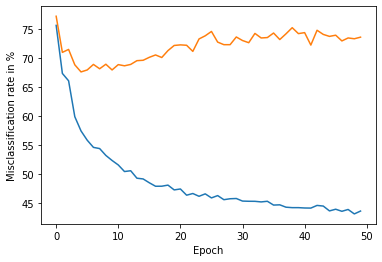

In [ ]:
def plot_learning_curves(run):
  history = run[0].history
  plt.plot([(1-z)*100 for z in history.history['categorical_accuracy']])
  plt.plot([(1-z)*100 for z in history.history['val_categorical_accuracy']])
  #plt.title('model 1 train and validation accuracy')
  plt.ylabel('Misclassification rate in %')
  plt.xlabel('Epoch')
  #plt.legend(['Training', 'Validation'], loc='upper left')
  #plt.legend('')
  plt.show()

trainX, trainY = generate_unequal_sequence(4,2, 10, "train")
model_4_10_ue = train_models(4,10,20,50,20,'tanh',0.4,'Adam',16,50,'LLDDO')
plot_learning_curves(model_4_10_ue)